# Explorotary Data Analysis (EDA)
The main objecitves of this notebook are 
- Performing a descriptive analysis of the dataset
- investigating relationships between features and the target variable 

# Imports

In [67]:
import pandas as pd 
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
 

# Data

In [68]:
train_df = pd.read_csv("./Dataset/train.csv")


In [69]:
train_df_c = train_df.copy()


In [70]:
train_df_c.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,NaN,NaN,...,نعم,البكالوريوس,هندسة حاسب الالي,NaN,2.44,4.0,غير موظف,NaN,NaN,0
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,NaN,متوسط,...,نعم,البكالوريوس,الإذاعة والتلفزيون والفيلم,الفنون والعلوم الإنسانية,5.00,5.0,طالب,NaN,NaN,0
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,NaN,NaN,متوسط,...,نعم,البكالوريوس,Information Technology,NaN,3.50,5.0,موظف,NaN,NaN,0
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,NaN,NaN,...,نعم,البكالوريوس,حوسبة تطبيقية - (مسار شبكات الحاسب),NaN,3.55,5.0,خريج,NaN,NaN,0
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,تقليدية,متوسط,...,لا,البكالوريوس,نظم المعلومات الحاسوبية,تكنولوجيا الاتصالات والمعلومات,4.00,5.0,NaN,NaN,NaN,0


In [71]:
train_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

In [72]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y'],
      dtype='object')

# General Analysis of different featrues with relation in completion of the program
In this section I explore the relations of different features with the completion of the program 
1. **Group Data by Gender and Completion Status**
2. **Group Data by Program Days and Completion Status**
3. **Group Data by College and Completion Status**

## **Does gender play role in the completion of the program?**

1. **Group Data by Gender and Completion Status**

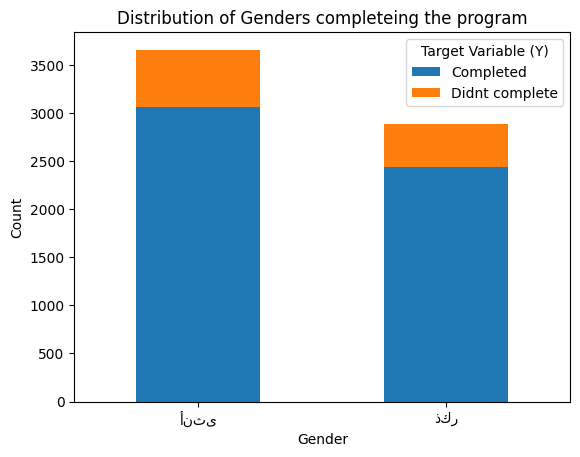

In [73]:
gender_y_sum  = train_df_c.groupby(['Gender','Y']).size().unstack()
gender_y_sum.plot(kind='bar', stacked=True)
plt.title('Distribution of Genders completeing the program')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target Variable (Y)', labels=['Completed', 'Didnt complete'])
plt.show()

In [74]:
gender_y_sum

Y,0,1
Gender,,
أنثى,3065,599
ذكر,2444,440


## **What about the length of the program does it play a role in the program completion?**

2. **Group Data by Program Days and Completion Status**


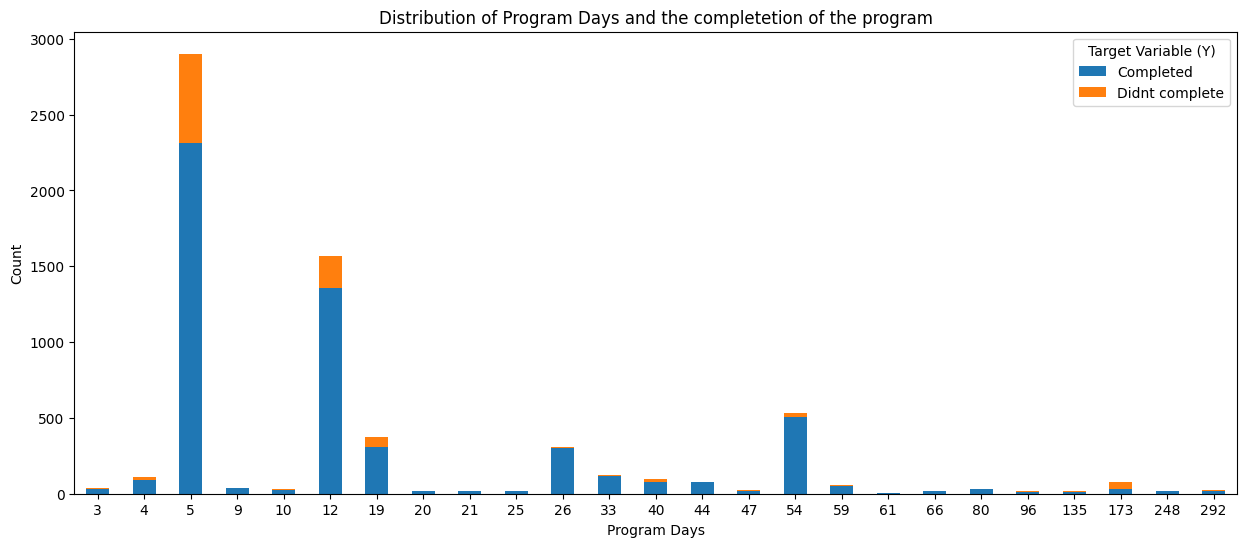

In [75]:
Program_Days_y_sum  = train_df_c.groupby(['Program Days','Y']).size().unstack()
Program_Days_y_sum.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Distribution of Program Days and the completetion of the program')
plt.xlabel('Program Days')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target Variable (Y)', labels=['Completed', 'Didnt complete'])
plt.show()


In [76]:
train_df_c['Program Days'].value_counts()

Program Days
5      2902
12     1566
54      531
19      374
26      311
33      125
4       113
40       99
173      80
44       77
59       60
3        37
9        35
10       32
80       28
292      25
47       22
66       21
25       19
21       18
248      18
96       17
20       15
135      15
61        8
Name: count, dtype: int64

**Note** There might be high variance in the <font color='red'>Program Days</font> feature

-----

## **Are some college students tend to complete the program more than others?**

3. **Group Data by College and Completion Status**

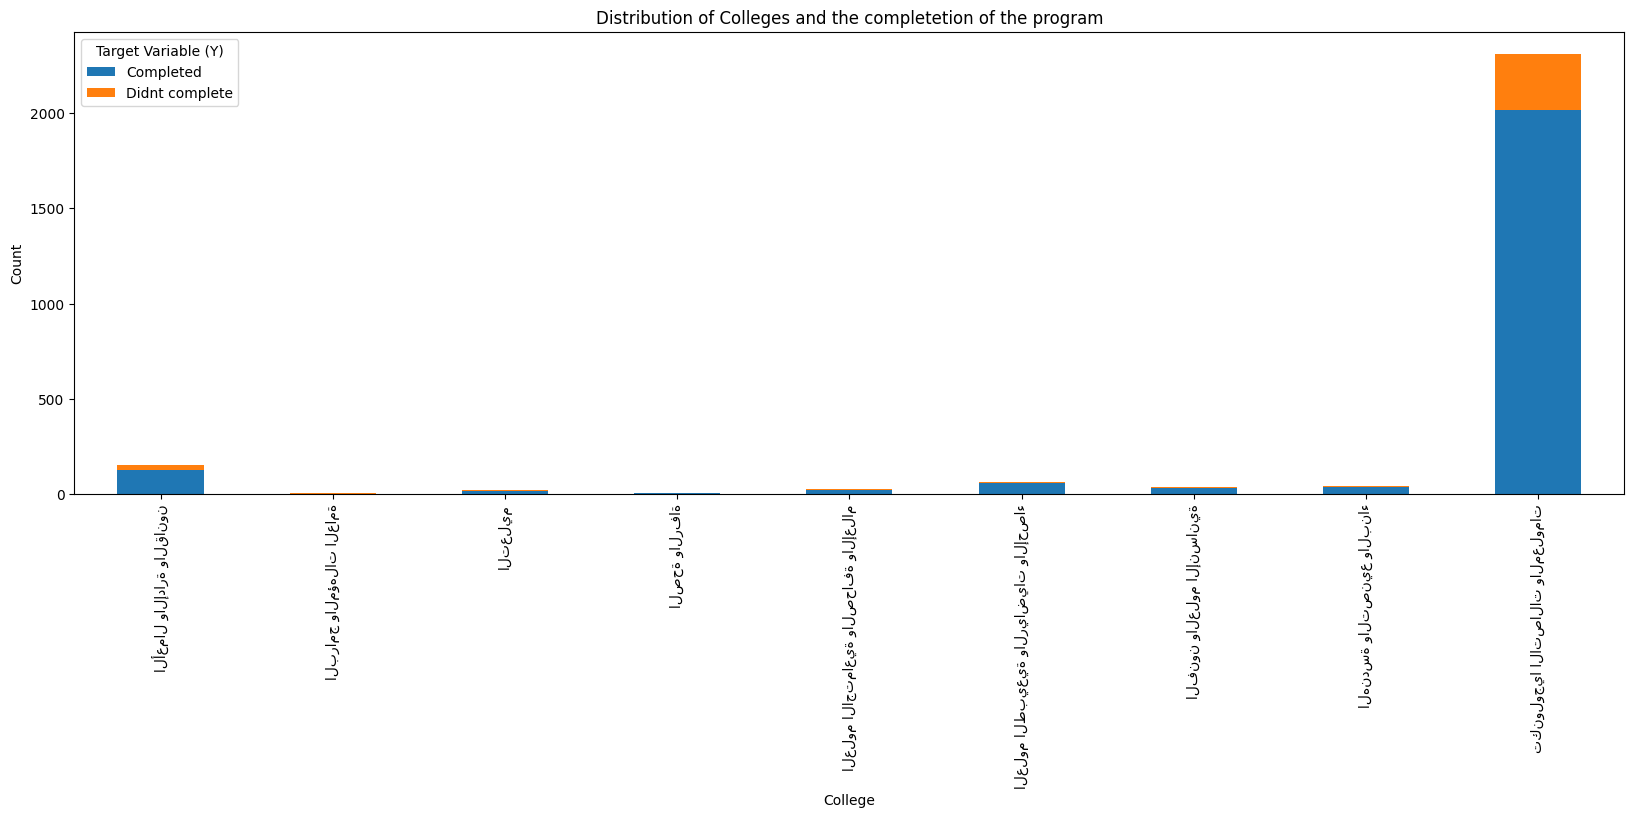

In [77]:
College_y_sum  = train_df_c.groupby(['College','Y']).size().unstack()
College_y_sum.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Distribution of Colleges and the completetion of the program')
plt.xlabel('College')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target Variable (Y)', labels=['Completed', 'Didnt complete'])
plt.show()


# In-depth Analysis (Answers for the questions above): 
**Objective**: To analyze the *completion rates* of different features to answer the questions above, taking into account the lack of data.
1. Completion rates for each College
2. Completion rates for each Genders
3. completetion rates for Program Days



1. Completion rates for each College
-----

In [78]:
total_per_college = College_y_sum.sum(axis=1)
print(f"Completetion rates for each {(College_y_sum[0]/total_per_college).sort_values(ascending=False)}")

Completetion rates for each College
العلوم الطبيعية والرياضيات والإحصاء    0.903226
تكنولوجيا الاتصالات والمعلومات         0.872837
الأعمال والإدارة والقانون              0.823529
الفنون والعلوم الإنسانية               0.815789
العلوم الاجتماعية والصحافة والإعلام    0.800000
الهندسة والتصنيع والبناء               0.790698
التعليم                                0.789474
الصحة والرفاة                          0.750000
البرامج والمؤهلات العامة               0.500000
dtype: float64


**Insights**

* STEM majors have more completion rates than others
* Mangment majors complete the programs more than Engineering majors
* The majors of Education and Health show low completion rates close to 78% and 75%, respectively. I assume this because they have a more stable jobs
and don't need to complete the programs

In [79]:
College_y_sum

Y,0,1
College,,
الأعمال والإدارة والقانون,126,27
البرامج والمؤهلات العامة,1,1
التعليم,15,4
الصحة والرفاة,3,1
العلوم الاجتماعية والصحافة والإعلام,20,5
العلوم الطبيعية والرياضيات والإحصاء,56,6
الفنون والعلوم الإنسانية,31,7
الهندسة والتصنيع والبناء,34,9
تكنولوجيا الاتصالات والمعلومات,2018,294


2. Completion rates for each Genders
-----

In [80]:
total_per_gender = gender_y_sum.sum(axis=1)
print(f"Completetion rates for each {(gender_y_sum[0]/total_per_gender).sort_values(ascending=False)}")

Completetion rates for each Gender
ذكر     0.847434
أنثى    0.836517
dtype: float64


In [82]:
gender_y_sum

Y,0,1
Gender,,
أنثى,3065,599
ذكر,2444,440


**Insights**
* The rates of completion for males 84% and females 83% are similar, with that I can conclude that there's no relation between the Gender and the completion rate

3. Completion rates for Program Days
-----

In [83]:
total_per_days = Program_Days_y_sum.sum(axis=1)
print(f"Completetion rates for each {(Program_Days_y_sum[0]/total_per_days).sort_values(ascending=False)}")

Completetion rates for each Program Days
25     1.000000
20     1.000000
80     1.000000
61     1.000000
9      1.000000
248    1.000000
44     0.974026
26     0.961415
54     0.956685
47     0.954545
21     0.944444
33     0.936000
59     0.900000
12     0.867178
19     0.823529
10     0.812500
3      0.810811
66     0.809524
40     0.808081
292    0.800000
5      0.798070
4      0.796460
135    0.733333
96     0.529412
173    0.375000
dtype: float64


**Observations**
* I notied that Program Days might be high in variance so let's do some math


The formula for Variance is:

$$ \sigma^2 = \frac{\sum\limits_{i=1}^{N} (x_i - \mu)^2}{N-1} $$




In [88]:
variance = train_df_c['Program Days'].var()
mean = train_df_c['Program Days'].mean()
print(f"The variance is: {variance} and the mean is {mean}")

The variance is: 1031.1844302309537 and the mean is 19.691661576053757


**Insights**
* *Variance* of 1031 is high which means the data is very spread out since the mean is only 19.6
* This high variance could affect the model with high noise and over fit it, feature scaling might be important for this feature